In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt





In [19]:
# Load the dataset
file_path = 'tamil_tracks.csv'  # Modify this with the actual path to your CSV file
data = pd.read_csv(file_path)


In [20]:
# Selecting relevant numeric features for the recommendation
features = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
            'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness',
            'tempo', 'time_signature', 'valence']

# Dropping rows with missing values
data_cleaned = data[features].dropna()



In [21]:
# Splitting the data into features and target variable
X = data_cleaned.drop('popularity', axis=1)
y = data_cleaned['popularity']



In [22]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [23]:
# Training the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Model is now trained and can be used for predictions
# To predict, use: knn_model.predict(scaler.transform(new_data))

KNeighborsRegressor()

In [24]:
# Predicting on test set
y_pred = knn_model.predict(X_test_scaled)



In [25]:
# Calculating the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")



Mean Squared Error: 372.53875637104994
Mean Absolute Error: 14.658307849133537
R^2 Score: -0.001251927961580579


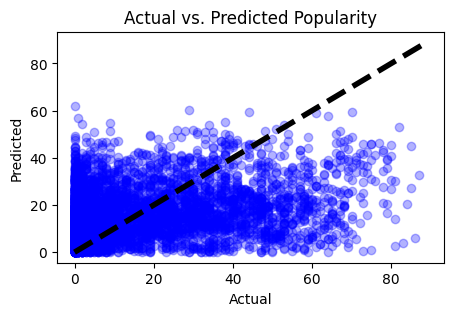

In [26]:
# Plotting predictions vs actual values
plt.figure(figsize=(5, 3))
plt.scatter(y_test, y_pred, alpha=0.3, color='blue')  # Plotting actual vs predicted values
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)  # Plotting a reference line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Popularity')
plt.show()



In [27]:
feature_dict = {
    'acousticness': [0.4],
    'danceability': [0.5],
    'duration_ms': [200000],
    'energy': [0.85],
    'instrumentalness': [0.01],
    'key': [0],
    'liveness': [0.1],
    'loudness': [-5],
    'mode': [1],
    'speechiness': [0.085],
    'tempo': [95],
    'time_signature': [4],
    'valence': [0.4]
}

# Creating a DataFrame from the feature dictionary
new_data_df = pd.DataFrame(feature_dict)

# Scaling the DataFrame using the previously fitted scaler
new_data_scaled = scaler.transform(new_data_df)

# Predicting popularity using the trained KNN model
predicted_popularity = knn_model.predict(new_data_scaled)
print(f"Predicted Popularity: {predicted_popularity[0]}")

Predicted Popularity: 40.6
